# Load the data we will work with

In [3]:
import pandas as pd

df = pd.read_csv("../data/btc_hour.csv")

## Visualise the `close` column

<Axes: >

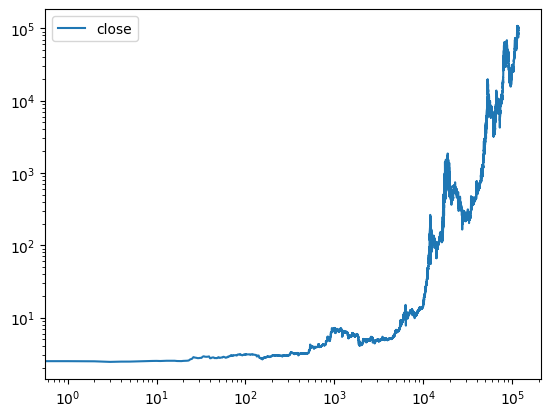

In [4]:
df[["close"]].plot(logy=True, logx=True)

## Clean the data

 - We really only want the data we're going to focus on for trading
 - Let's keep `time`, `close` and `volumeto`
 - By just keeping these, we'll also drop the NaN column called conversionSymbol
 - We'll also want time in a datetime format

In [12]:
df_ = df[["time", "close", "volumeto"]]
df_.dtypes

# Convert time to datetime
df_["time"] = pd.to_datetime(df_["time"])
df_.dtypes

/var/folders/h2/4n19j41n6dxg73lj5xpbvsfr0000gn/T/ipykernel_37210/3626017561.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_["time"] = pd.to_datetime(df_["time"])


time        datetime64[ns, UTC]
close                   float64
volumeto                float64
dtype: object

/var/folders/h2/4n19j41n6dxg73lj5xpbvsfr0000gn/T/ipykernel_37210/1978254345.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_["ma50"] = df_["close"].rolling(50).mean()


<Axes: xlabel='time'>

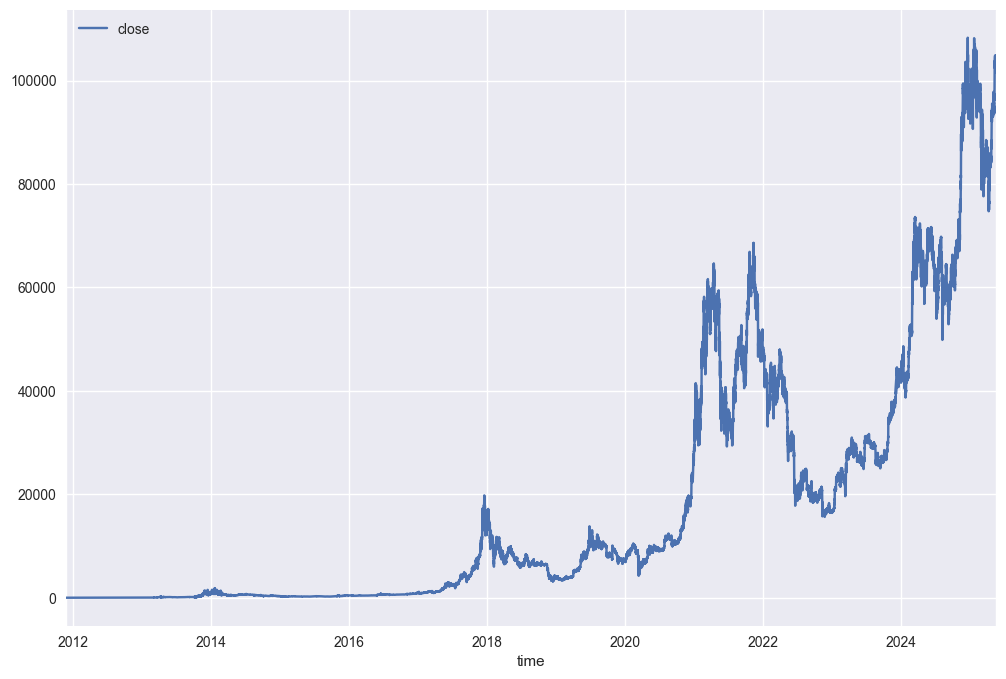

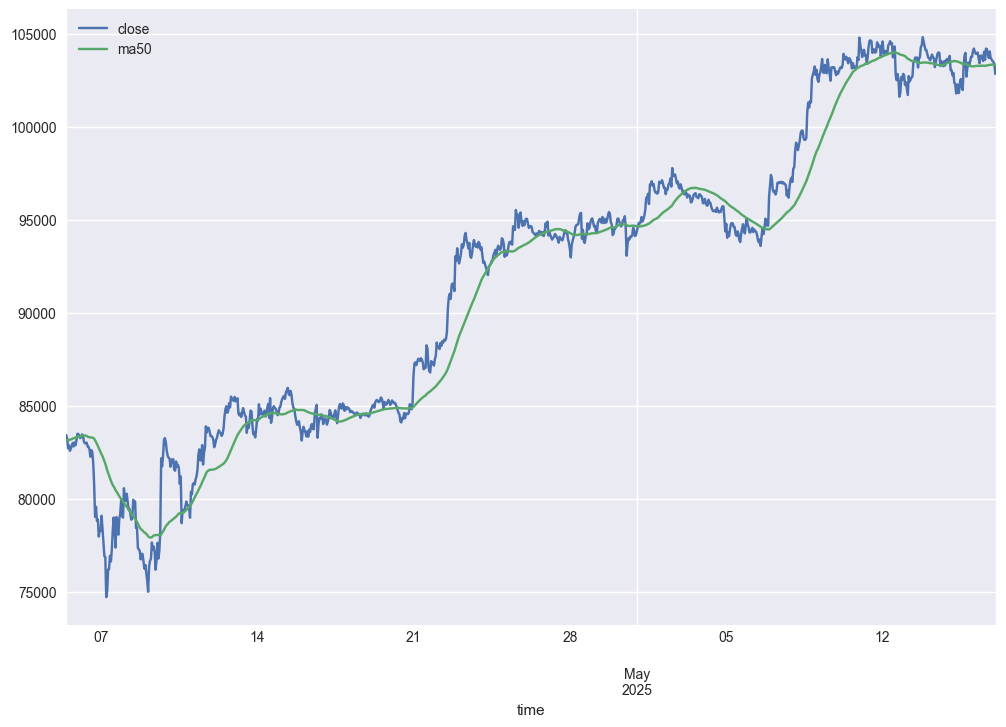

In [18]:
import matplotlib.pyplot as plt

# Let's make our matplotlib plot look a bit nicer, and a bit larger
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (12, 8)

# Let's visualise the data
df_.plot(x="time", y="close")

## Let's add a column for the 50-day moving average
df_["ma50"] = df_["close"].rolling(50).mean()
df_.tail(1000).plot(x="time", y=["close", "ma50"])


In [19]:
df.tail(10)

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
118049,2025-05-16 17:00:00+00:00,104439.55,103813.40,104197.55,667.46,6.952808e+07,103901.00,direct,NaN
118050,2025-05-16 18:00:00+00:00,104123.27,103723.85,103901.00,554.10,5.757738e+07,103723.85,direct,NaN
118051,2025-05-16 19:00:00+00:00,104086.62,103619.15,103723.85,993.14,1.031001e+08,104064.76,direct,NaN
118052,2025-05-16 20:00:00+00:00,104072.28,103562.97,104064.76,504.69,5.237515e+07,103722.24,direct,NaN
118053,2025-05-16 21:00:00+00:00,103818.99,103538.42,103722.24,356.41,3.696248e+07,103643.59,direct,NaN
118054,2025-05-16 22:00:00+00:00,103649.83,103450.36,103643.59,978.41,1.012609e+08,103551.32,direct,NaN
118055,2025-05-16 23:00:00+00:00,103718.44,103465.47,103551.32,312.40,3.235507e+07,103499.60,direct,NaN
118056,2025-05-17 00:00:00+00:00,103569.60,103141.31,103499.60,488.11,5.044067e+07,103388.02,direct,NaN
118057,2025-05-17 01:00:00+00:00,103388.09,102642.39,103388.02,669.72,6.891526e+07,102859.21,direct,NaN
118058,2025-05-17 02:00:00+00:00,103316.88,102779.28,102859.21,263.48,2.715254e+07,103307.02,direct,NaN


---